In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.1 MB/s eta 0:00:00


In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [22]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [18]:
# import functions from modsim

from modsim import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import abs, mean
from modsim import TimeSeries, decorate

In [19]:
from pandas import read_html

In [23]:
filename = 'World_population_estimates.html'
tables = read_html(filename,
                   header=0,
                   index_col=0,
                   decimal='M')

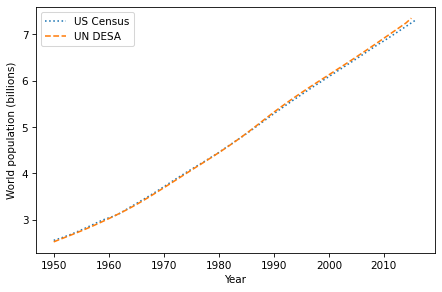

Mean Absolute Error: 0.029034508242424265
Mean Relative Error: 0.5946585816022846


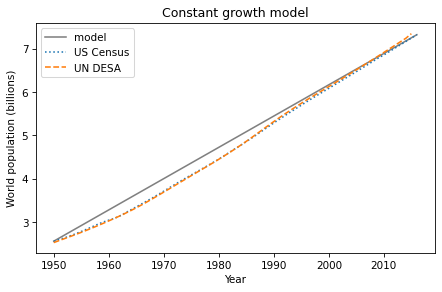

In [24]:


# Read the data from the Wikipedia page
filename = 'World_population_estimates.html'
tables = pd.read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]

# Shorten column names for convenience
table2.columns = ['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben', 'mj', 'thomlinson', 'durand', 'clark']

# Extract population estimates in billions
census = table2['census'] / 1e9
un = table2['un'] / 1e9

# Plot the estimates
def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    decorate(xlabel='Year', ylabel='World population (billions)')

plot_estimates()
plt.show()

# Calculate absolute and relative errors
abs_error = abs(un - census)
rel_error = 100 * abs_error / census

# Print mean absolute error and mean relative error
print("Mean Absolute Error:", mean(abs_error))
print("Mean Relative Error:", mean(rel_error))

# Model population growth using a constant growth model
t_0 = census.index[0]
t_end = census.index[-1]
elapsed_time = t_end - t_0
p_0 = census[t_0]
p_end = census[t_end]
total_growth = p_end - p_0
annual_growth = total_growth / elapsed_time

# Simulate population growth
results = TimeSeries()
results[t_0] = p_0

for t in range(t_0, t_end):
    results[t+1] = results[t] + annual_growth

# Plot the results
results.plot(color='gray', label='model')
plot_estimates()
decorate(title='Constant growth model')
plt.show()
